In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
%cd /content/drive/MyDrive/Technology of AI(Assignment1)

/content/drive/MyDrive/Technology of AI(Assignment1)


# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:

Data Exploration and Understanding:


• Dataset Overview:


1. Load Dataset and Display First 10 Rows

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("World Happiness Report.csv")
# Display the first 10 rows
print(df.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

2. Identify the number of rows and columns in the dataset.


In [52]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 143, Columns: 9



3. List all the columns and their data types.

In [54]:
print(df.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.


In [55]:
print(df["score"].mean(), df["score"].median(), df["score"].std())

5.52758041958042 5.785 1.1707165099442995



2. Identify the country with the highest and lowest happiness scores.

In [56]:
print(df.loc[df["score"].idxmax()])
print(df.loc[df["score"].idxmin()])

Country name                    Finland
score                             7.741
Log GDP per capita                1.844
Social support                    1.572
Healthy life expectancy           0.695
Freedom to make life choices      0.859
Generosity                        0.142
Perceptions of corruption         0.546
Dystopia + residual               2.082
Name: 0, dtype: object
Country name                    Afghanistan
score                                 1.721
Log GDP per capita                    0.628
Social support                          0.0
Healthy life expectancy               0.242
Freedom to make life choices            0.0
Generosity                            0.091
Perceptions of corruption             0.088
Dystopia + residual                   0.672
Name: 142, dtype: object


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [57]:
print(df.isnull().sum())

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.


In [58]:
filtered_df = df[df["score"] > 7.5]

2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [59]:
print(filtered_df.sort_values(by="Log GDP per capita", ascending=False).head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [60]:
conditions = [
    (df['score'] < 4),
    (df['score'] >= 4) & (df['score'] <= 6),
    (df['score'] > 6)
]
categories = ['Low', 'Medium', 'High']
df['Happiness Category'] = np.select(conditions, categories, default='Unknown')

print("\nAdded 'Happiness Category' column:")
print(df[['Country name', 'score', 'Happiness Category']].head())


Added 'Happiness Category' column:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart

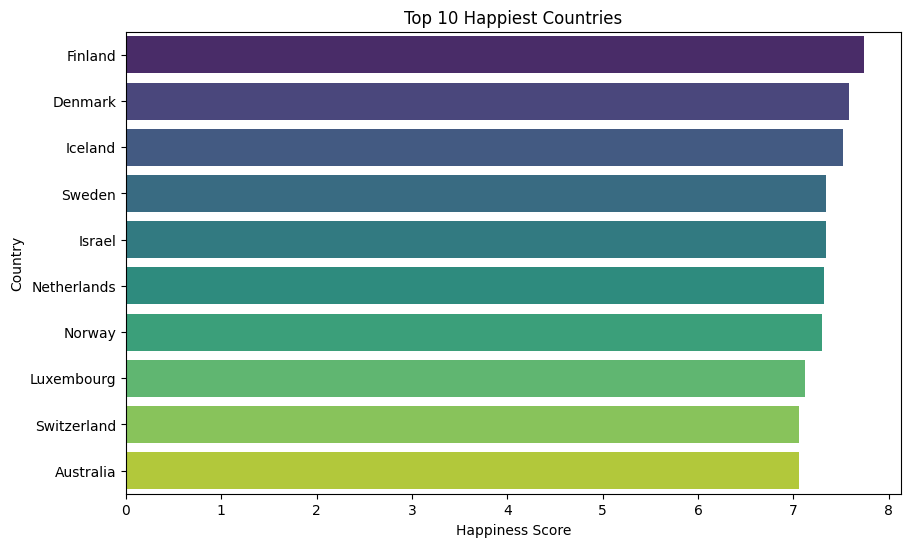

In [61]:

# Bar Plot: Top 10 happiest countries by Score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, hue='Country name', dodge=False, palette='viridis', legend=False)
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()


• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart

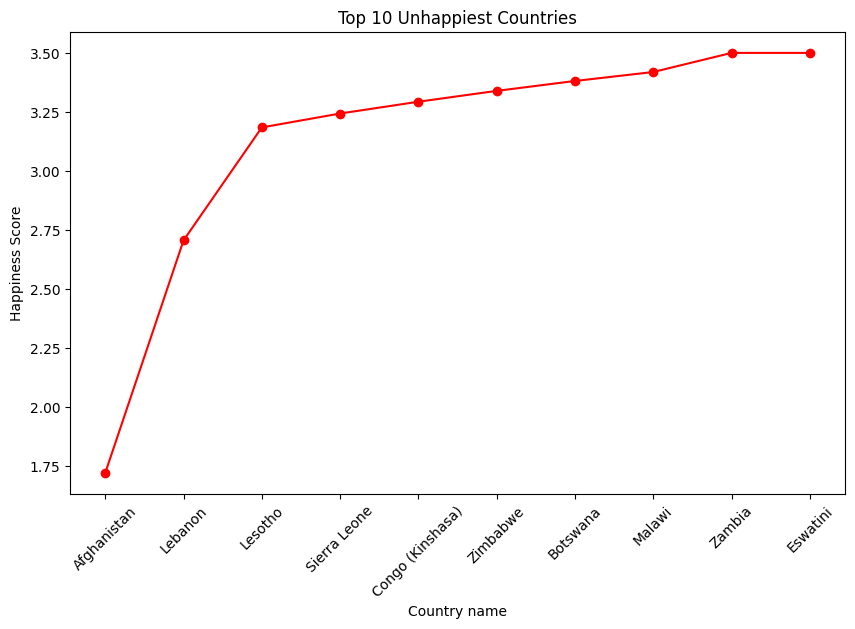

In [62]:
# Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='r')
plt.title("Top 10 Unhappiest Countries")
plt.xlabel("Country name")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

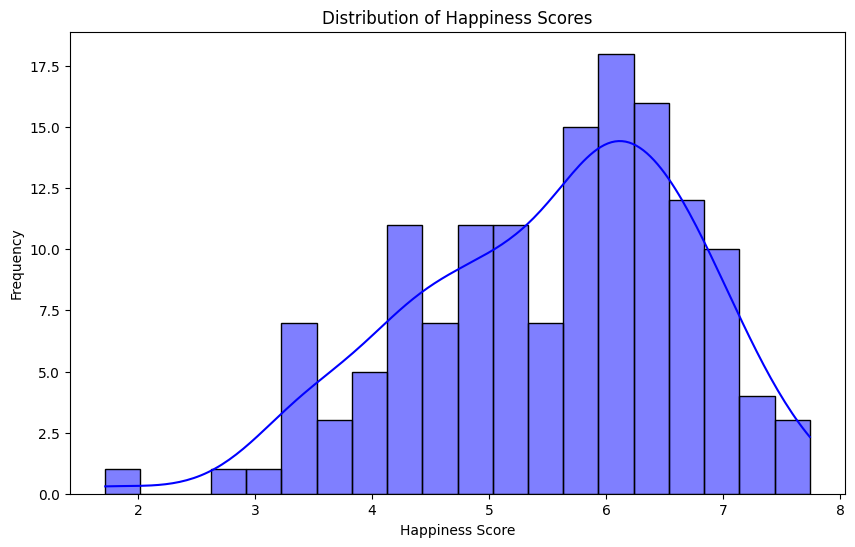

In [63]:
# Histogram: Distribution of the Score column
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True, bins=20, color='blue')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

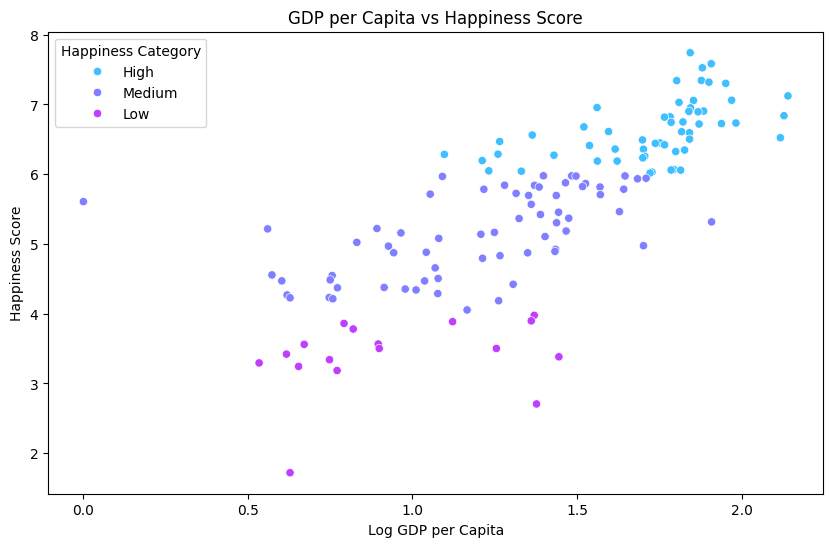

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', hue='Happiness Category', data=df, palette='cool')
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(title="Happiness Category")
plt.show()

# 3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [90]:
# Define South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered DataFrame to a new CSV file
south_asia_df.to_csv("South_Asia_Happiness.csv", index=False)
print("\nSouth Asia dataset saved as 'South_Asia_Happiness.csv'.")


South Asia dataset saved as 'South_Asia_Happiness.csv'.


**Task - 2 - Composite Score Ranking:**
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.

In [91]:
### Task 2: Composite Score Ranking
# Calculate Composite Score
south_asia_df = south_asia_df.copy()  # Create a copy to avoid SettingWithCopyWarning
south_asia_df.loc[:, 'Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Rank countries by Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Display the top 5 countries
print("\nTop 5 South Asian Countries by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']].head(5))




Top 5 South Asian Countries by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score

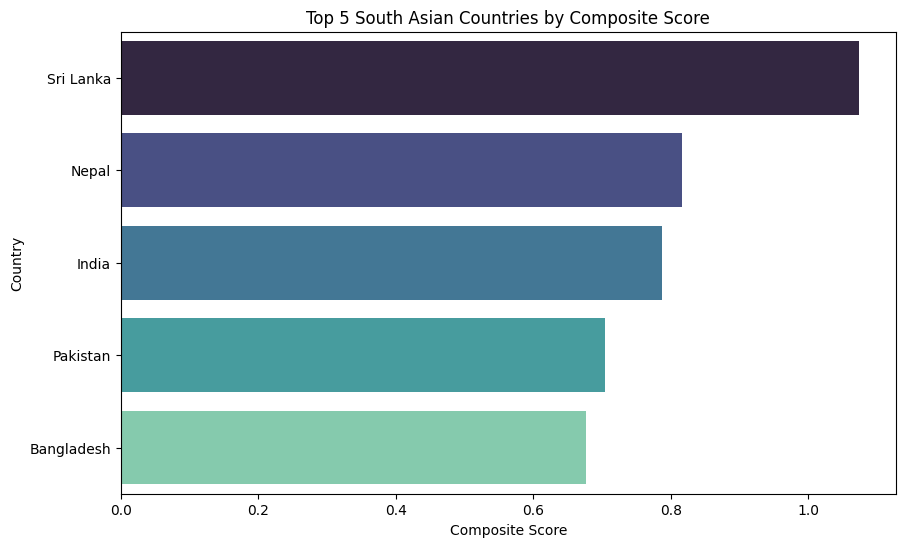

In [95]:
# Horizontal bar chart for top 5 countries by Composite Score
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Composite Score',
    y='Country name',
    data=south_asia_df.head(5),
    hue='Country name',  # Assign the y variable to hue
    dodge=False,
    palette='mako'
)
plt.legend([], [], frameon=False)  # Remove the legend if unnecessary
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

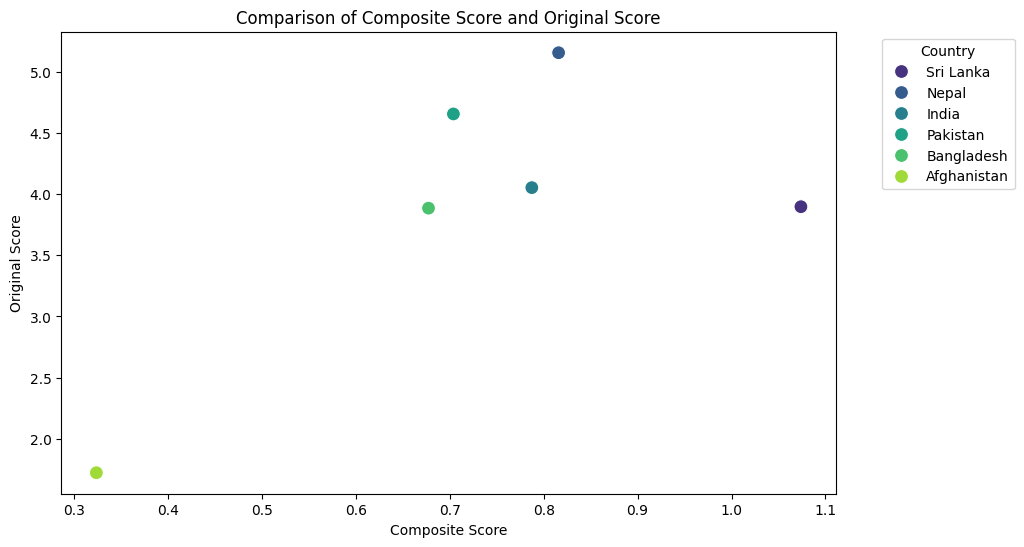

In [68]:
# Compare rankings based on Composite Score and original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Composite Score', y='score', data=south_asia_df,
    hue='Country name', palette='viridis', s=100
)
plt.title("Comparison of Composite Score and Original Score")
plt.xlabel("Composite Score")
plt.ylabel("Original Score")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

In [94]:
### Task 3: Outlier Detection
# Define outliers using the 1.5 * IQR rule
Q1 = south_asia_df['Log GDP per capita'].quantile(0.25)
Q3 = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier countries
outliers = south_asia_df[
    (south_asia_df['Log GDP per capita'] < lower_bound) |
    (south_asia_df['Log GDP per capita'] > upper_bound)
]
print("\nOutlier countries based on GDP per Capita:")
print(outliers[['Country name', 'Log GDP per capita', 'score']])


Outlier countries based on GDP per Capita:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

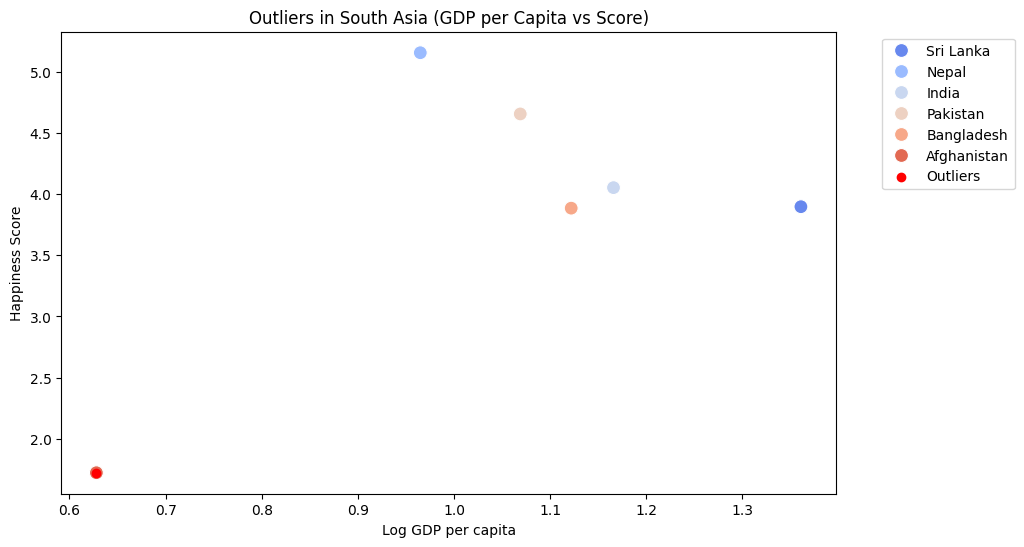

In [70]:
# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score', data=south_asia_df,
    hue='Country name', palette='coolwarm', s=100
)
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.title("Outliers in South Asia (GDP per Capita vs Score)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [71]:
### Task 4: Exploring Trends Across Metrics
# Calculate correlations with Score for two metrics
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {}
for metric in metrics:
    correlations[metric] = south_asia_df[metric].corr(south_asia_df['score'])

print("\nCorrelations with Happiness Score:")
for metric, corr in correlations.items():
    print(f"{metric}: {corr:.2f}")



Correlations with Happiness Score:
Freedom to make life choices: 0.80
Generosity: 0.87


2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

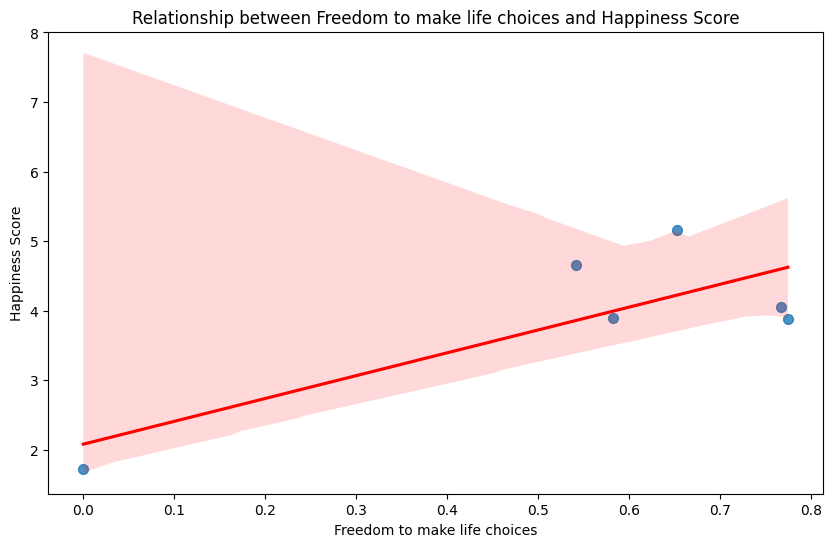

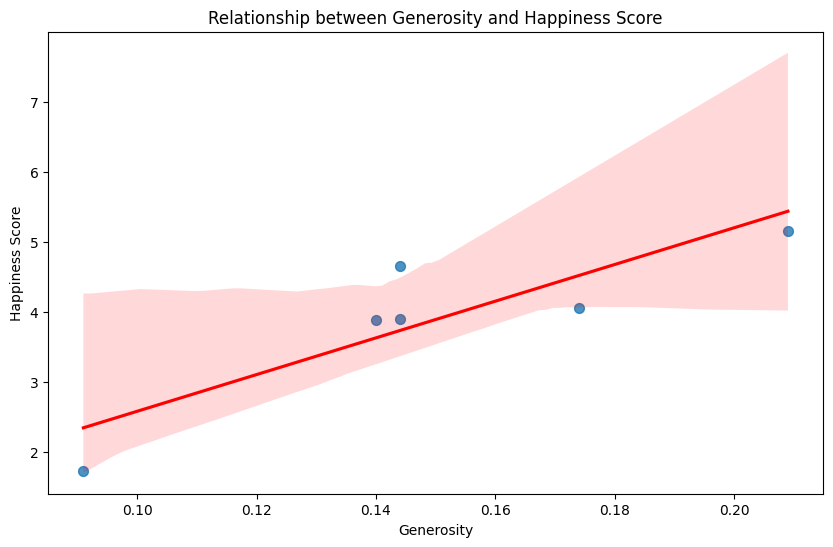

In [72]:
# Scatter plots with trendlines for selected metrics
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=metric, y='score', data=south_asia_df,
        line_kws={"color": "red"}, scatter_kws={"s": 50}
    )
    plt.title(f"Relationship between {metric} and Happiness Score")
    plt.xlabel(metric)
    plt.ylabel("Happiness Score")
    plt.show()


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.


In [73]:
### Task 5: Gap Analysis
# Add a new column for GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank countries by GDP-Score Gap in ascending and descending order
gap_asc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True).head(3)
gap_desc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False).head(3)

print("\nTop 3 countries with largest positive GDP-Score Gap:")
print(gap_desc[['Country name', 'GDP-Score Gap']])

print("\nTop 3 countries with largest negative GDP-Score Gap:")
print(gap_asc[['Country name', 'GDP-Score Gap']])


Top 3 countries with largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 countries with largest negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

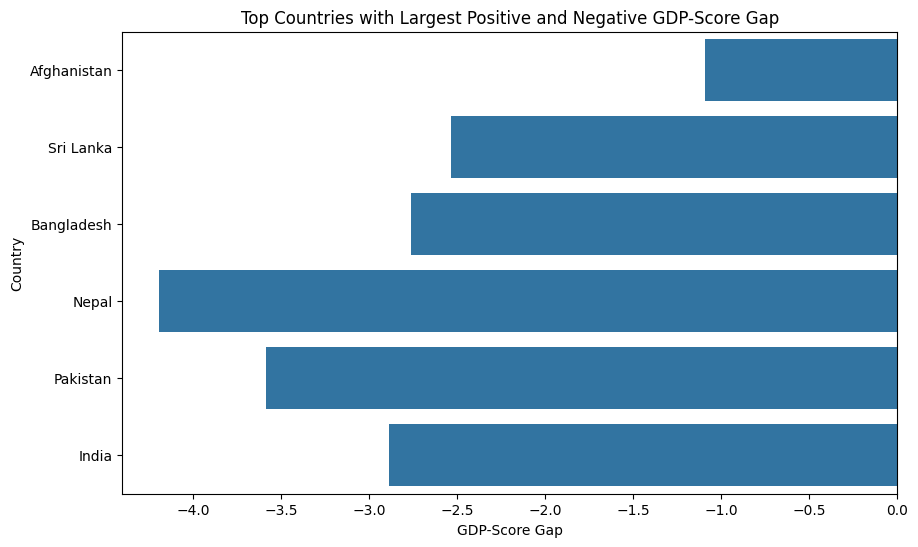

In [93]:
# Bar chart for top 3 positive and negative GDP-Score Gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([gap_desc, gap_asc]))
plt.title("Top Countries with Largest Positive and Negative GDP-Score Gap")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country")
plt.show()

# 3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
Complete the following task:
1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [75]:

# Define South Asia and Middle East country lists

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter datasets for South Asia and Middle East
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Save filtered dataframes for future use
south_asia_df.to_csv("South_Asia_Happiness.csv", index=False)
middle_east_df.to_csv("Middle_East_Happiness.csv", index=False)

### Task 1: Descriptive Statistics
# Calculate mean and standard deviation for Score in both regions
south_asia_stats = south_asia_df['score'].agg(['mean', 'std'])
middle_east_stats = middle_east_df['score'].agg(['mean', 'std'])

print("\nSouth Asia Happiness Statistics:")
print(south_asia_stats)

print("\nMiddle East Happiness Statistics:")
print(middle_east_stats)

# Determine which region has a higher average happiness score
region_higher_avg = "South Asia" if south_asia_stats['mean'] > middle_east_stats['mean'] else "Middle East"
print(f"\nRegion with higher average happiness score: {region_higher_avg}")


South Asia Happiness Statistics:
mean    3.895667
std     1.177069
Name: score, dtype: float64

Middle East Happiness Statistics:
mean    5.412100
std     1.566201
Name: score, dtype: float64

Region with higher average happiness score: Middle East


• Which region has higher happiness Scores on average?

In [76]:
### Task 2: Top and Bottom Performers
# Identify top 3 and bottom 3 countries in each region
top_3_sa = south_asia_df.nlargest(3, 'score')
bottom_3_sa = south_asia_df.nsmallest(3, 'score')

top_3_me = middle_east_df.nlargest(3, 'score')
bottom_3_me = middle_east_df.nsmallest(3, 'score')

print("\nTop 3 South Asian Countries by Happiness Score:")
print(top_3_sa[['Country name', 'score']])

print("\nBottom 3 South Asian Countries by Happiness Score:")
print(bottom_3_sa[['Country name', 'score']])

print("\nTop 3 Middle Eastern Countries by Happiness Score:")
print(top_3_me[['Country name', 'score']])

print("\nBottom 3 Middle Eastern Countries by Happiness Score:")
print(bottom_3_me[['Country name', 'score']])


Top 3 South Asian Countries by Happiness Score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 South Asian Countries by Happiness Score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 Middle Eastern Countries by Happiness Score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle Eastern Countries by Happiness Score:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

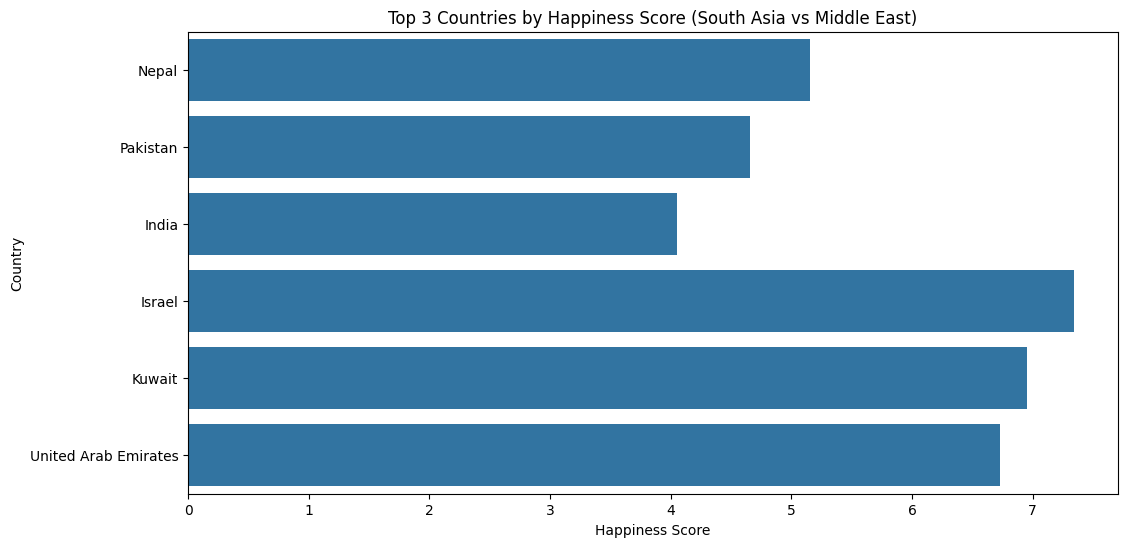

In [77]:
# Bar charts for comparison
plt.figure(figsize=(12, 6))
sns.barplot(
    y='Country name', x='score', data=pd.concat([top_3_sa, top_3_me])
)
plt.title("Top 3 Countries by Happiness Score (South Asia vs Middle East)")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.



In [78]:
### Task 3: Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculate mean for each metric in both regions
south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

print("\nMetric Comparisons (South Asia vs Middle East):")
print("\nSouth Asia Means:")
print(south_asia_means)

print("\nMiddle East Means:")
print(middle_east_means)


Metric Comparisons (South Asia vs Middle East):

South Asia Means:
Log GDP per capita         1.051833
Social support             0.611833
Healthy life expectancy    0.420333
dtype: float64

Middle East Means:
Log GDP per capita         1.496333
Social support             1.152778
Healthy life expectancy    0.554111
dtype: float64


• Which metrics show the largest disparity between the two regions?

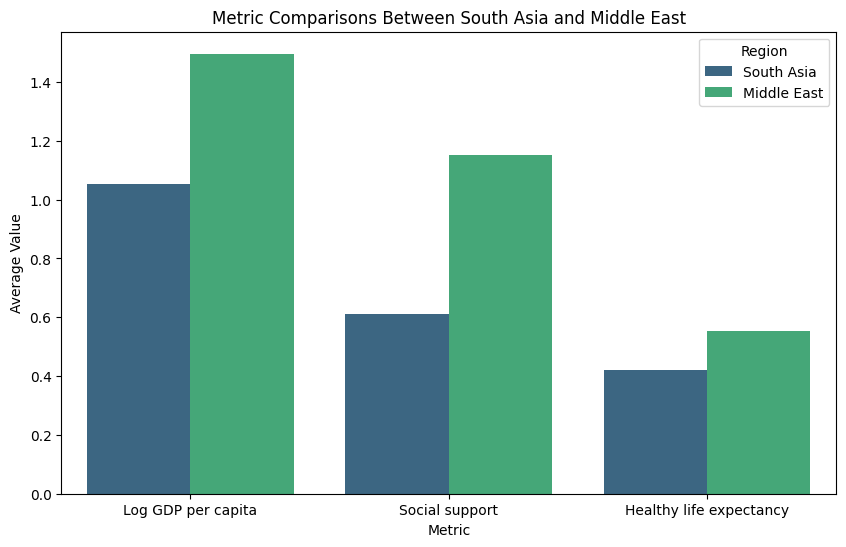

In [79]:
# Grouped bar chart for metric comparisons
metric_comparison = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asia_means.values,
    'Middle East': middle_east_means.values
}).melt(id_vars='Metric', var_name='Region', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=metric_comparison, palette='viridis')
plt.title("Metric Comparisons Between South Asia and Middle East")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.show()

4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [81]:
### Task 4: Happiness Disparity
# Calculate range and coefficient of variation (CV) for Score in both regions
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

sa_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
me_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print("\nHappiness Disparity:")
print(f"South Asia - Range: {sa_range}, CV: {sa_cv:.2f}")
print(f"Middle East - Range: {me_range}, CV: {me_cv:.2f}")



Happiness Disparity:
South Asia - Range: 3.4370000000000003, CV: 0.30
Middle East - Range: 4.634, CV: 0.29


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.



In [82]:
### Task 5: Correlation Analysis
# Correlation of Score with other metrics
correlations_sa = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
correlations_me = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("\nCorrelation Analysis (South Asia):")
print(correlations_sa['score'])

print("\nCorrelation Analysis (Middle East):")
print(correlations_me['score'])



Correlation Analysis (South Asia):
score                           1.000000
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Correlation Analysis (Middle East):
score                           1.000000
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


• Create scatter plots to visualize and interpret the relationships.

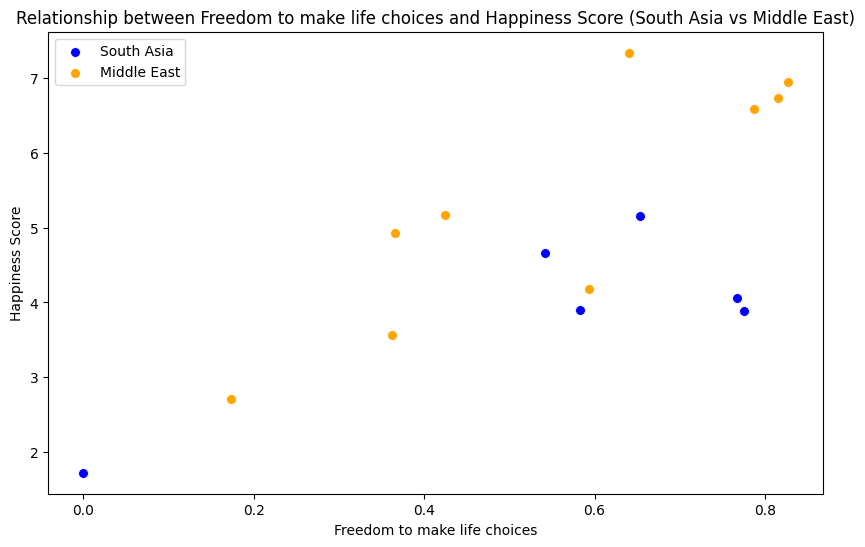

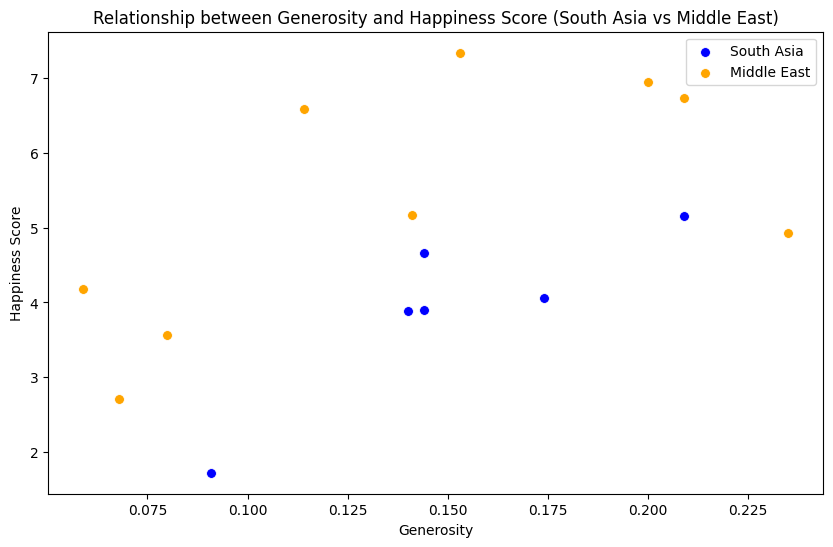

In [83]:
# Scatter plots for correlations
for metric in ['Freedom to make life choices', 'Generosity']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=metric, y='score', data=south_asia_df, label="South Asia", color="blue", s=50)
    sns.scatterplot(x=metric, y='score', data=middle_east_df, label="Middle East", color="orange", s=50)
    plt.title(f"Relationship between {metric} and Happiness Score (South Asia vs Middle East)")
    plt.xlabel(metric)
    plt.ylabel("Happiness Score")
    plt.legend()
    plt.show()


6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [84]:
### Task 6: Outlier Detection
# Define outliers using 1.5 * IQR for Score in both regions
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_sa = find_outliers(south_asia_df, 'score')
outliers_me = find_outliers(middle_east_df, 'score')

print("\nOutliers in South Asia:")
print(outliers_sa[['Country name', 'score']])

print("\nOutliers in Middle East:")
print(outliers_me[['Country name', 'score']])


Outliers in South Asia:
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score]
Index: []


7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

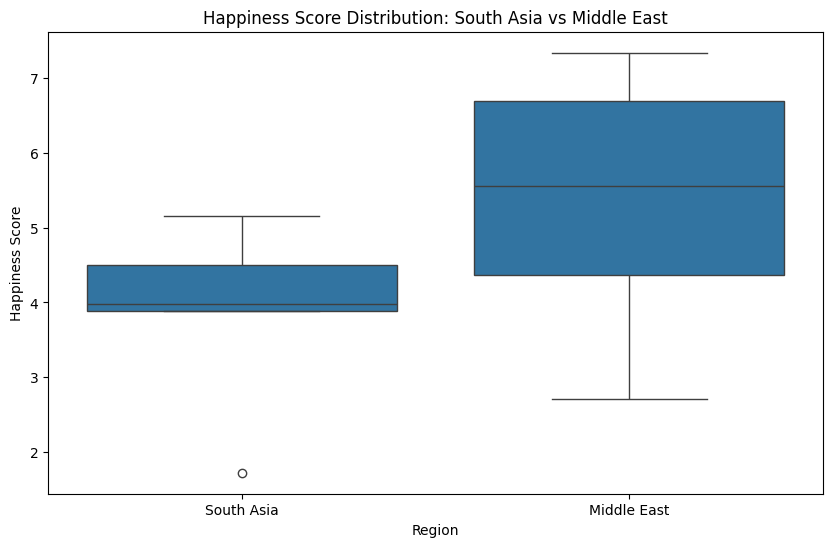

In [92]:
# Boxplots for Score distributions
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Region', y='score',
    data=pd.concat([
        south_asia_df.assign(Region='South Asia'),
        middle_east_df.assign(Region='Middle East')
    ])
)
plt.title("Happiness Score Distribution: South Asia vs Middle East")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.show()